In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [27]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [28]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [29]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [30]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [31]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [32]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=529819963c28d200151b4d0648f81ded


In [44]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao joao da barra
Processing Record 2 of Set 1 | qasigiannguit
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | desaguadero
Processing Record 6 of Set 1 | porto novo
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | aransas pass
Processing Record 10 of Set 1 | emba
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | birao
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | ust-kut
Processing Record 

City not found. Skipping...
Processing Record 35 of Set 4 | aanekoski
Processing Record 36 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 37 of Set 4 | grafton
Processing Record 38 of Set 4 | maple grove
Processing Record 39 of Set 4 | coahuayana
Processing Record 40 of Set 4 | katherine
Processing Record 41 of Set 4 | bandarbeyla
Processing Record 42 of Set 4 | dudinka
Processing Record 43 of Set 4 | papetoai
Processing Record 44 of Set 4 | san vicente
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | uruguaiana
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | anadyr
Processing Record 49 of Set 4 | boma
Processing Record 50 of Set 4 | sault sainte marie
Processing Record 1 of Set 5 | nisia floresta
Processing Record 2 of Set 5 | barreirinhas
Processing Record 3 of Set 5 | belyy yar
Processing Record 4 of Set 5 | faya
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | namibe
Processing Record 7 o

Processing Record 25 of Set 8 | porteirinha
Processing Record 26 of Set 8 | angoram
Processing Record 27 of Set 8 | laem sing
Processing Record 28 of Set 8 | hovd
Processing Record 29 of Set 8 | iowa city
Processing Record 30 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 31 of Set 8 | afua
Processing Record 32 of Set 8 | soyo
Processing Record 33 of Set 8 | nuuk
Processing Record 34 of Set 8 | alugan
Processing Record 35 of Set 8 | nyurba
Processing Record 36 of Set 8 | muros
Processing Record 37 of Set 8 | aksu
Processing Record 38 of Set 8 | kirakira
Processing Record 39 of Set 8 | cukai
Processing Record 40 of Set 8 | tara
Processing Record 41 of Set 8 | balkhash
Processing Record 42 of Set 8 | vanimo
Processing Record 43 of Set 8 | ucluelet
Processing Record 44 of Set 8 | charters towers
Processing Record 45 of Set 8 | saldanha
Processing Record 46 of Set 8 | port elizabeth
Processing Record 47 of Set 8 | san felipe
Processing Record 48 of Set 8 | chalmette
Proce

Processing Record 14 of Set 12 | limbang
Processing Record 15 of Set 12 | anaconda
Processing Record 16 of Set 12 | iglesias
Processing Record 17 of Set 12 | buluang
Processing Record 18 of Set 12 | villanueva
Processing Record 19 of Set 12 | nizhniy ingash
Processing Record 20 of Set 12 | san quintin
Processing Record 21 of Set 12 | imeni zhelyabova
Processing Record 22 of Set 12 | portland
Processing Record 23 of Set 12 | tigil
Processing Record 24 of Set 12 | sankheda
Processing Record 25 of Set 12 | pangkalanbuun
Processing Record 26 of Set 12 | san patricio
Processing Record 27 of Set 12 | rovaniemi
Processing Record 28 of Set 12 | lethem
Processing Record 29 of Set 12 | pacanga
Processing Record 30 of Set 12 | arlit
Processing Record 31 of Set 12 | mookane
Processing Record 32 of Set 12 | asyut
Processing Record 33 of Set 12 | kosino
Processing Record 34 of Set 12 | antalaha
Processing Record 35 of Set 12 | puerto ayacucho
Processing Record 36 of Set 12 | maarianhamina
Processing

In [45]:
len(city_data)

580

In [46]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Joao Da Barra,-21.6403,-41.0511,71.74,67,100,13.62,BR,2021-05-24 23:00:13
1,Qasigiannguit,68.8193,-51.1922,42.44,40,100,27.20,GL,2021-05-24 22:55:53
2,Rikitea,-23.1203,-134.9692,76.91,79,97,18.66,PF,2021-05-24 23:00:14
3,Kodiak,57.7900,-152.4072,52.83,59,0,6.89,US,2021-05-24 23:00:14
4,Desaguadero,-16.5656,-69.0417,46.54,53,100,3.47,PE,2021-05-24 23:00:14
5,Porto Novo,6.4965,2.6036,84.02,83,44,6.69,BJ,2021-05-24 22:55:41
6,Ushuaia,-54.8000,-68.3000,29.86,93,90,31.07,AR,2021-05-24 23:00:15
7,Mataura,-46.1927,168.8643,40.73,71,4,3.15,NZ,2021-05-24 23:00:15
8,Aransas Pass,27.9095,-97.1500,82.42,85,40,11.99,US,2021-05-24 23:00:16
9,Emba,48.8264,58.1442,72.99,31,1,8.41,KZ,2021-05-24 23:00:16


In [48]:
# Reorder the columns
city_data_new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Joao Da Barra,BR,2021-05-24 23:00:13,-21.6403,-41.0511,71.74,67,100,13.62
1,Qasigiannguit,GL,2021-05-24 22:55:53,68.8193,-51.1922,42.44,40,100,27.20
2,Rikitea,PF,2021-05-24 23:00:14,-23.1203,-134.9692,76.91,79,97,18.66
3,Kodiak,US,2021-05-24 23:00:14,57.7900,-152.4072,52.83,59,0,6.89
4,Desaguadero,PE,2021-05-24 23:00:14,-16.5656,-69.0417,46.54,53,100,3.47
5,Porto Novo,BJ,2021-05-24 22:55:41,6.4965,2.6036,84.02,83,44,6.69
6,Ushuaia,AR,2021-05-24 23:00:15,-54.8000,-68.3000,29.86,93,90,31.07
7,Mataura,NZ,2021-05-24 23:00:15,-46.1927,168.8643,40.73,71,4,3.15
8,Aransas Pass,US,2021-05-24 23:00:16,27.9095,-97.1500,82.42,85,40,11.99
9,Emba,KZ,2021-05-24 23:00:16,48.8264,58.1442,72.99,31,1,8.41


In [50]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [51]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

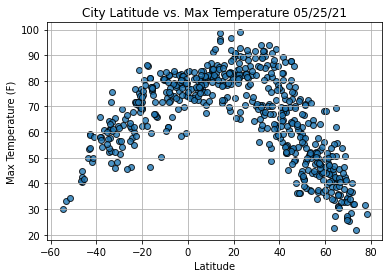

In [52]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

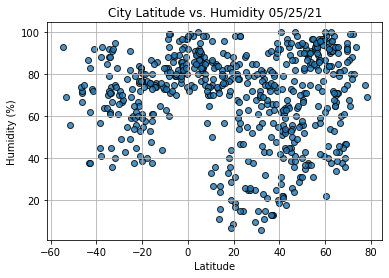

In [53]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

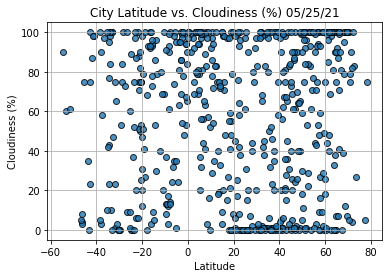

In [54]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

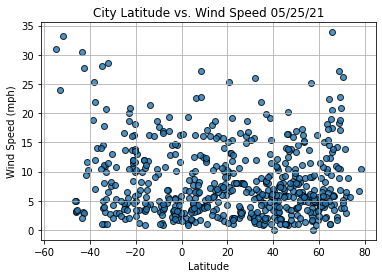

In [55]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()